# Optics Lab 2: Polarization
### *James Katz, Patrick Keeney, Mark Swartz*
___

### Abstract

___

Malus' Law is a fundamental property in the polarization of light.  In optics, polarizer devices are consistently used in technology and research.  Malus' Law states $I = I_{0}cos^{2}(\alpha - \theta)$, where $I$ is the final intensity of light after polarization, $I_0$ is the initial intensity of light, while $\alpha$ and $\theta$ are the intitial polarization of light and the secondary polarization of light, respectively.$\newline$
We found that the intensity of light does vary as a function of polarization angle and indeed gives a $cos^{2}(\alpha - \theta)$ distribution.  We took data of power at angles from -20 to 100 degrees, found a regression curve, fit the curve to a $cos^{2}(\alpha - \beta)$ function, and found a mean square error of $3.41\times 10^{-8}.$  Error was highest at intensity maximizing angles, while error was lowest at intensity extinction angles.  Possible reasons for error include power fluctuations at the source and inadequate data points taken.

___

In [92]:
'''
First import modules used.  If you have any trouble with the modules, they may not be installed.  Just delete the '#'
in front of the module you're missing and run this cell again.
'''

#!pip install numpy
#!pip install matplotlib
#!pip install pandas
#!pip install csv
#!pip install sklearn
#!pip install tabulate
from IPython.display import Image
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score,mean_squared_error
from tabulate import tabulate

%matplotlib inline

___
## Introduction
___

Light propogates in space along its momentum vector, $\vec{k}$.  The electric and magnetic field directions, $\hat{E}$ and $\hat{H}$, are both normal to the direction of $\hat{k}$.  The purpose of a polarizer is to orient the electric field directions into one direction by projecting the electric field direction, $\hat{E}$, onto the polarization direction, $\hat{p}$, such that the intensity of light transmitted at the other side of the polarizer is $I = I_{0}(\hat{E}\cdot\hat{p})^{2} = I_{0}cos^{2}(\theta)$, where $I_{0}$ is the incident intensity of light before the polarizer and $\theta$ is the angle between the initial polarization of light and the polarization direction, $\hat{p}$ of the polarizer.$\newline$
In order to get this result, the incident light must be polarized to begin with.  Jones vectors, $\hat{\mathscr{j}}_{in}$ and $\hat{\mathscr{j}}_{out}$, can be used to represent the electric field of light propogating in and out of optical devices.$\newline$

In 1808, Malus' Law was derived by French engineer, Etienne-Louis Malus.

<u>Derivation of Malus' Law</u>

Assume $\vec{E}$ is polarized as $\hat{\mathscr{j}}_{in} = cos(\alpha)\hat{x} + sin(\alpha)\hat{y}$ and a second polarizer of polarization direction, $\hat{x}^{\prime}$, goes as $\hat{x}^{\prime} = cos(\theta)\hat{x} + sin(\theta)\hat{y}$.$\newline$
The intensity of light is defined by $I = I_{0} = |\hat{\mathscr{j}}_{in}|^{2} = \hat{\mathscr{j}}_{in}\cdot \hat{\mathscr{j}}_{in}^{*} = 1$, where $\hat{\mathscr{j}}_{in}$ is a normalized as $\hat{\mathscr{j}}_{in} = \frac{\vec{E}}{|\vec{E}|}$.$\newline$

Since the electric field $\hat{\mathscr{j}}_{in}$ is already linearly polarized in one direction, it will enter the second polarizer of polarization direction, $\hat{x}$.$\newline$

$I_{final} = I_{0}|\hat{\mathscr{j}}_{in}\cdot \hat{x}^{\prime}|^{2} = I_{0}[(\hat{\mathscr{j}}_{in}\cdot \hat{x}^{\prime})(\hat{\mathscr{j}}_{in}\cdot \hat{x}^{\prime})^{*}]^{2} = I_{0}[(cos\alpha\hat{x}+sin\alpha\hat{x})(cos\theta\hat{x}+sin\theta\hat{x})] = I_{0}(cos\alpha cos\theta + sin\alpha sin\theta)^{2}$ $\newline$
= $I_{0}cos^{2}(\alpha - \theta)$ = $I_{0}cos^{2}(\Delta \phi)$ $\newline$

___



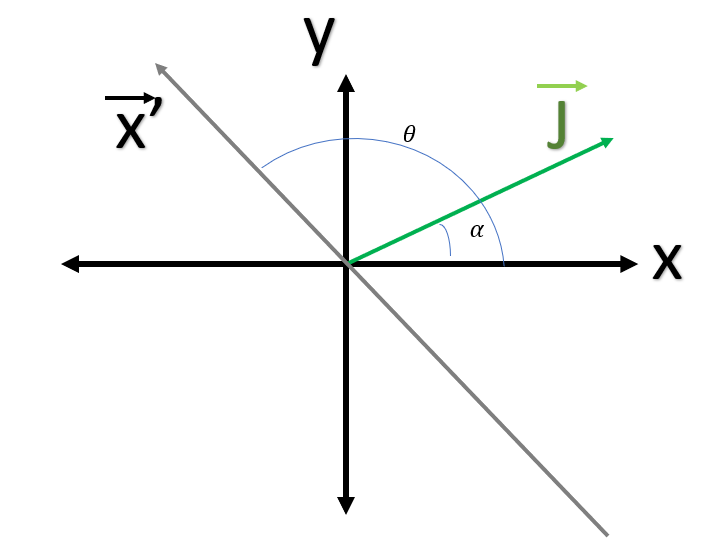

In [93]:
Image(filename='diagram.png',width=500,height=500)

This final intensity is determined by the difference of the two polarization angles, normalized to the initial intensity of the source.  When difference of the angles is 0, the final intensity is equal to the original intensity.  Conversly, when the difference in angles is $\pi/2$, light is extinguished on the other side.  The intensity varies as a function of the difference of anlges and resembles a $cos^{2}$ function.  At any phase during which some or all of the intensity is extinguished, the polarizer absorbs the intensity lost as heat.  Malus' law is fundamental in the study of optics and it is our aim to verify its validity in practice.
___

### Experimental Procedure
___

In order to verify Malus' Law, our expermimental set-up included a breadboard and ThorLabs software for data collection.

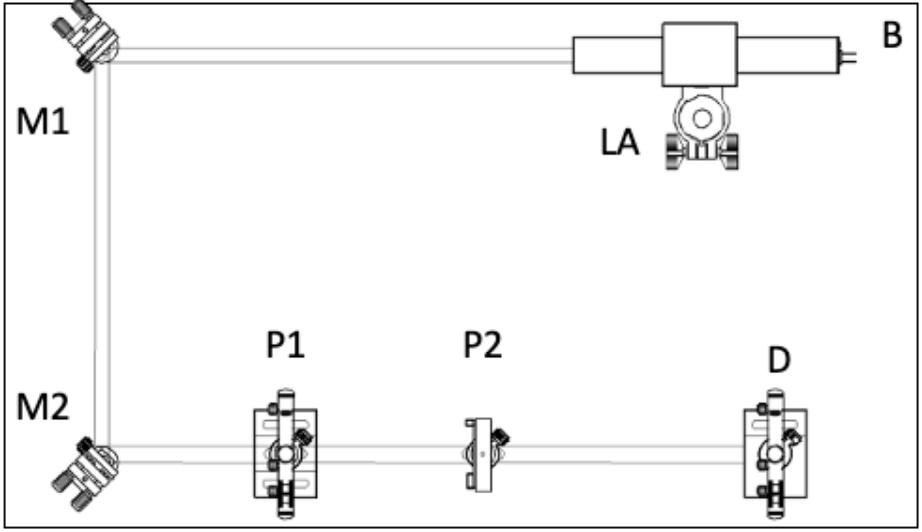

In [94]:
Image(filename='setup.png',width=500,height=500)

___

The experimental setup is given by the figure above.  Our laser source is given by 'LA', laser assembly, is an HE-NE laser which monochromatically emits red light.  M1 and M2 represent mirrors positioned at 90 degrees which reflect the laser to the other side of the board, a total of 180 degrees to maximize the length.  The light is then polarized by P1, a rotationally adjustable optical polarizer and then subsequentially polarized by P2, a fixed polarizer.  The light reaches a photodiode, D, which measures the lights power.  This signal is then sent to a computer with ThorLabs software installed to record data at different time intervals.

___

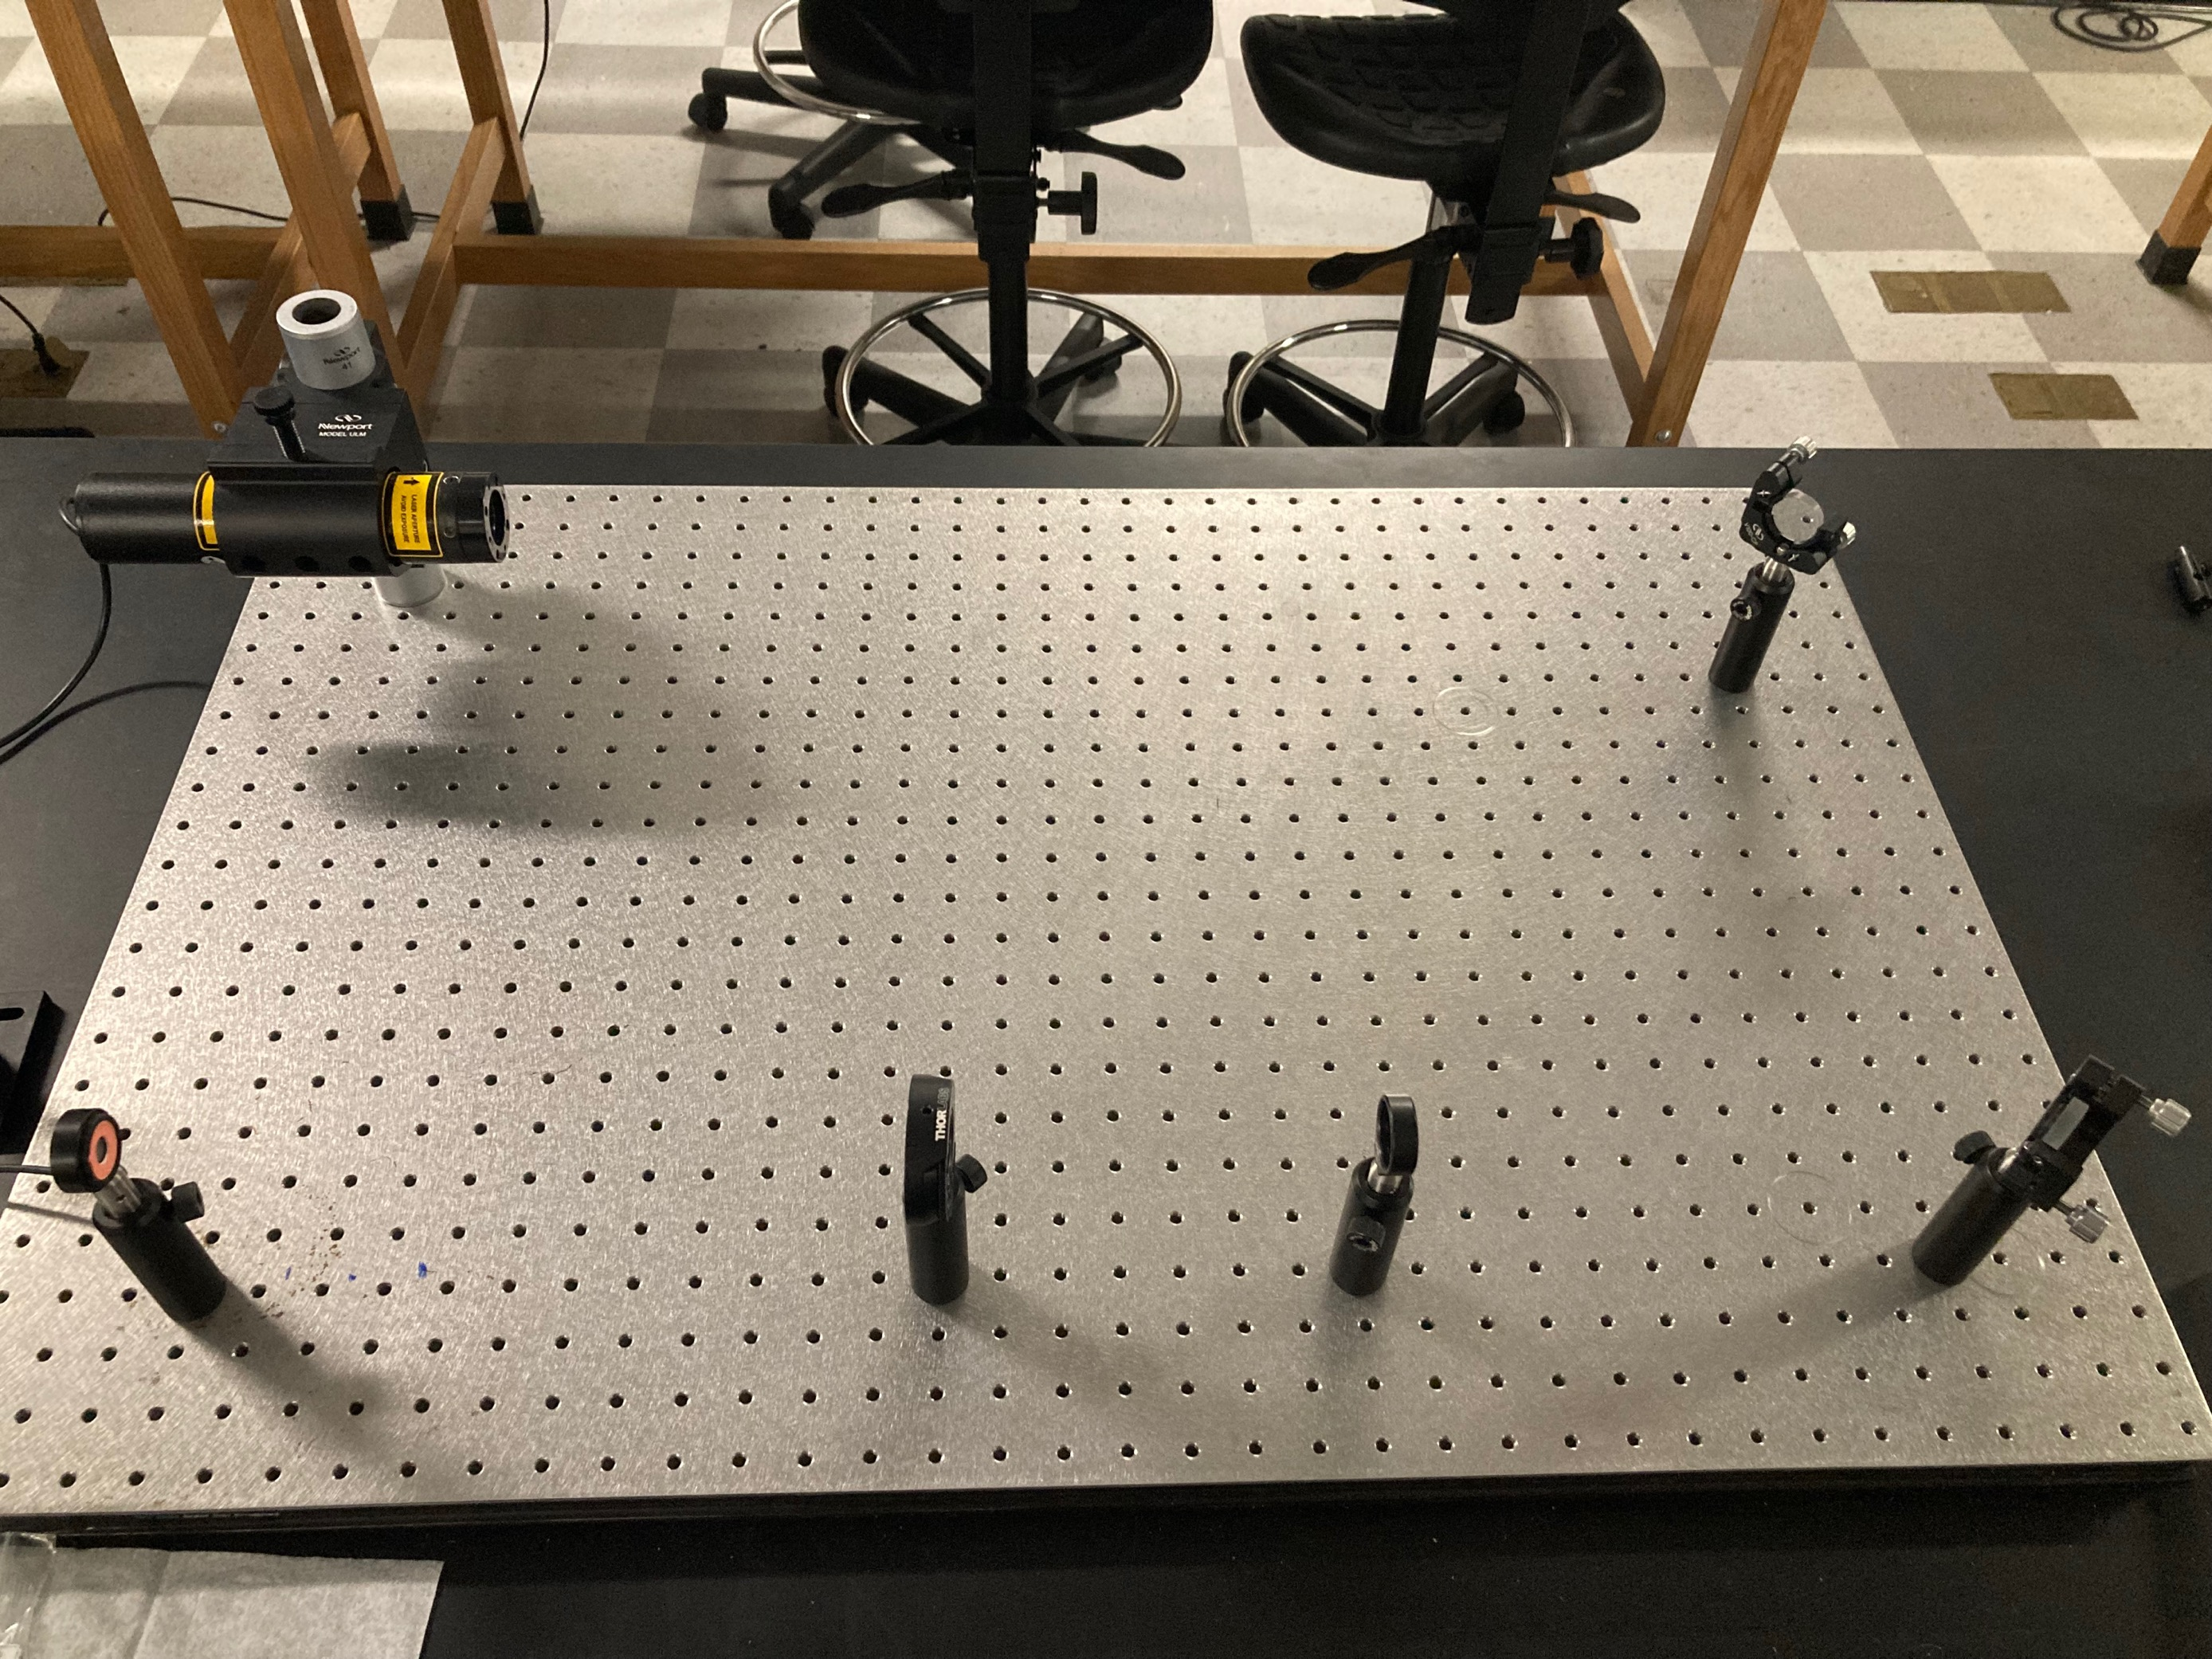

In [95]:
Image(filename='setup1.png',width=500,height=500)

___
The image above is the actual setup we used.  The distance from the LS to M1 was 66.7 cm, from M1 to M2 was 36.3 cm, from M2 to P1 was 26 cm, from P1 to P2 was 18.2 cm, and from P2 to D was 29.8 cm.  The only difference between the diagram setup and our setup - is that P2 is our rotationally adjustable polarizer.
We started off by keeping the rotationally adjustable polarizer, P2, fixed and measuring the light intensity for an extended amount of time in order to find the variability of its fluctuations.  After this, we calibrated the data collection software to take 10 second data collections, each with two data points.  We took data in the dark in order to minimize outside light power fluctuations from affecting our photodiode's saturation.$\newline$
We found the extinction angle for P2 to be $54^{\circ}$.  We used this number to represent our angle of extinction, $90^{\circ}$, and subsequently took our ten second measurements while adjusting the P2 polarizer by two degrees each collection.  Because of the high variability we found in our power fluctuations of our laser source, we decided to use a random number generator to find angles between -20 degrees and 100 degrees by two degrees, leading to 60 data points to fit to Malus' Law.  We decided to go from -20 to 100 degrees instead of 0 to 90 degrees to give further confidence in our $cos^{2}$ distribution.$\newline$
We then analyse the data.  We neglected to find the intitial intensity, so in order to fit our function to a $cos^{2}$ curve, we found a regression curve with maximized the $R^2$ score and then used the maximum point of that function as $I_{0}$.  When we had the $cos^{2}$ curve fit, we then found a second regression curve for our data which minimized the distance between itself and the $cos^{2}$ curve.  Lastly, we used Mean Standard Error to get the error between both the regression curve and the $cos^{2}$ function we hoped to fit.
___

### Results, Analysis and Discussion

___

In [96]:
'''
We extract the measured power fluctuations from our source.  We should have used the power maximum to do so in order to
get a good average of the power maximum, however we used a random angle which we failed to record.

The power fluctuation does however give a good representation of the need to use random angles in our sampling.  It also
provides a good explanation for systematic error.
'''


df_power_arr = []

# We clean the data and extract intensity using a for loop.  There are 5 data files, each with a 10 minute
# measurement time.

for i in range(1,5):
    string = 'PowerSample_' + str(i) + '.csv'
    cols = ['itr','date','Power']

    df = pd.read_csv(string, sep='delimiter', names = cols,engine='python')
    df = df[15:76]

    lines = []
    for line in df['itr']:
        line = line.split(',')
        lines.append(line)

    df = pd.DataFrame(lines)
    power_array = df[3]
    df_power = power_array.values.tolist()
    df_power_arr.append(df_power)

    for i in range(0, len(df_power)):
        df_power[i] = float(df_power[i])
        
df_power_arr = np.concatenate(df_power_arr, axis=0)

In [97]:
'''
We construct an array 'arr' which holds the time in seconds over the course of intensity measurements.  We recorded
a total of 2370 seconds of fluctuations.  Each measurement was taken every 10 seconds.
'''

arr = []
j=0
for i in range(237):
    arr.append(j)
    j = j + 10

fluc_dict = {
    'Time [s]':arr,
    'df_power [W]':df_power_arr
}
    
fluctuation_table = pd.DataFrame(fluc_dict)
fluctuation_table

,Time [s],df_power [W]
0,0,0.000414
1,10,0.000389
2,20,0.000350
3,30,0.000356
4,40,0.000351
...,...,...
232,2320,0.000387
233,2330,0.000389
234,2340,0.000378
235,2350,0.000375


In [98]:
'''
We calculated the mean and standard deviation of our power fluctuations.  Despite not recording the angle or finding
the maximum intensity polarization angle, it would be good analysis to compare the max r_2 regression curve's maximum with
the average of the fluctuation measurements.
'''

mean_fluc = np.mean(fluctuation_table['df_power [W]'])
stdev_fluc = np.std(fluctuation_table['df_power [W]'])

fluc_table = [['Average Power [W]',mean_fluc],
              ['Standard Deviation [W]',stdev_fluc]]

print('The table below gives the average and standard deviation for intensity fluctuations')
print(tabulate(fluc_table))

The table below gives the average and standard deviation for intensity fluctuations
----------------------  -----------
Average Power [W]       0.000386235
Standard Deviation [W]  1.63535e-05
----------------------  -----------


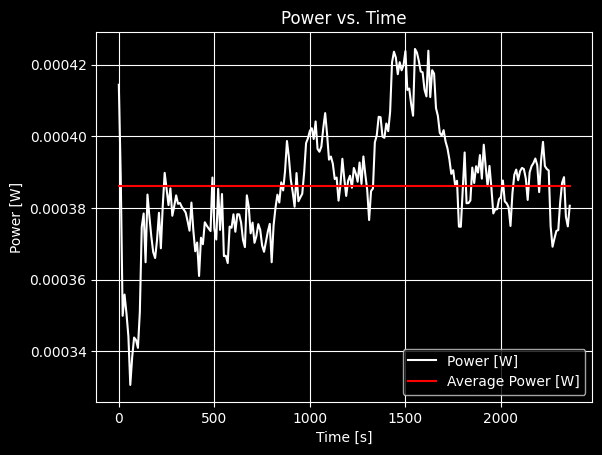

In [99]:
'''
We form an array of the constant mean power to match the size of the time array.
'''
mean_line = []
for i in range(len(arr)):
    mean_line.append(mean_fluc)

'''
We graph intensity vs. time (10 second incremented measurements) of our power source.
'''

with plt.style.context('dark_background'):
    plt.plot(arr,df_power_arr,color= 'white',label='Power [W]')
    plt.plot(arr,mean_line,color='r',label='Average Power [W]')
    plt.title('Power vs. Time')
    plt.xlabel('Time [s]')
    plt.ylabel('Power [W]')
    plt.grid()
    plt.legend()
    plt.show()

In [100]:
'''
We used a random number generator to generate our sampling angles, which was an attempt to combat
the fluctuations of intensity and reduce our systematic error.  'Angle' cooresponds to a random angle
chosen between 0 and 120 inclusively.  Only even numbers will be selected.  To adjust this to our scale
of -20 to 100 (which we are intending on plotting), we define 'Plotting Angle', which encompasses
our desired range for graphing.  Lastly, we account for the extinction angle of our polarizer to be
54 degrees by mapping 54 to 90 and phase shifting by 36, which is the angle we used to turn our polarizer to.
This angle is given as 'Rotation Angle'.
'''

randomList=[]
for i in range(1000):
   r=random.randint(0,121)
   if r not in randomList and r%2 == 0:
      randomList.append(r)

'''
Our polarizer gave an extinction angle of 52 degrees.  We counted this as 0 degrees and intended on phase shifting our angles.
So we subtracted all of our angles by 38.
'''

df_random = pd.DataFrame(randomList,columns = ['Angle'])
df_random['Rotation Angle'] = df_random['Angle']-36
df_random['Plotting Angle'] = df_random['Angle'] - 20

plotting_angle_list = df_random['Plotting Angle'].tolist()

print('The random plotting angle range from', min(df_random['Plotting Angle']), 'to ',max(df_random['Plotting Angle']),
     'and have a length of', len(df_random['Plotting Angle']),'. There are ', len(plotting_angle_list), 'unique values.')
print(df_random.to_string())

The random plotting angle range from -20 to  100 and have a length of 61 . There are  61 unique values.
    Angle  Rotation Angle  Plotting Angle
0      30              -6              10
1      12             -24              -8
2     102              66              82
3      10             -26             -10
4       4             -32             -16
5      24             -12               4
6      92              56              72
7       8             -28             -12
8      22             -14               2
9      86              50              66
10     60              24              40
11    118              82              98
12    106              70              86
13     28              -8               8
14     40               4              20
15    116              80              96
16     58              22              38
17     94              58              74
18    120              84             100
19     70              34              50
20     50     

In [101]:
'''
While making measurements, we turned the polarizer angle to the next random number generated in the previous cell, until
all data points were taken.  We then saved each into a .csv file format.  The files were under naming convention:

n20.csv,n18.csv,...,0.csv,2.csv,...99.csv,100.csv
where 'n' represents a minus sign.

We cleaned the data, took averages of each file and arranged them all in an array.  We also made an array of the angles.
'''


avrg = []
angle = []

for i in reversed(range(2,21,2)):
    string = 'n' + str(i) + '.csv'
    df = pd.read_csv(string, sep='delimiter',engine='python')
    df = df[12:14]
    df.columns=['itr']
    lines = []
    for line in df['itr']:
        line = line.split(',')
        lines.append(line)
    df = pd.DataFrame(lines)
    power = df[3]  
    power = power.values.tolist()
    for j in range(0, len(power)):
        power[j] = float(power[j])
    avg = np.mean(power)
    avrg.append(avg)
    angle.append(-i)

for i in range(0,101,2):
    string = str(i) + '.csv'
    df = pd.read_csv(string, sep='delimiter',engine='python')
    df = df[12:14]
    df.columns=['itr']
    lines = []
    for line in df['itr']:
        line = line.split(',')
        lines.append(line)
    df = pd.DataFrame(lines)
    power = df[3]
    power = power.values.tolist()
    for j in range(0, len(power)):
        power[j] = float(power[j])
    avg = np.mean(power)
    avrg.append(avg)
    angle.append(i)
    
data_dict = {
    'Angle [degrees]':angle,
    'Average Power [W]':avrg
}


data = pd.DataFrame(data_dict)
print(data.to_string())

    Angle [degrees]  Average Power [W]
0               -20           0.000330
1               -18           0.000320
2               -16           0.000337
3               -14           0.000308
4               -12           0.000311
5               -10           0.000313
6                -8           0.000356
7                -6           0.000349
8                -4           0.000381
9                -2           0.000373
10                0           0.000420
11                2           0.000359
12                4           0.000395
13                6           0.000405
14                8           0.000410
15               10           0.000382
16               12           0.000367
17               14           0.000369
18               16           0.000373
19               18           0.000377
20               20           0.000382
21               22           0.000379
22               24           0.000374
23               26           0.000349
24               28      

In [102]:
%%capture
'''
Finds fit with highest r2_score.  We don't use this fit, but it is useful because it provides the scaling factor we
need in order to to fit the cos^2 function later.
'''

r2_search = []
for i in range(1,100):

    model_r2 = np.poly1d(np.polyfit(angle,avrg,i))
    line = np.linspace(-20,100,60)
    r2 = r2_score(avrg,model_r2(angle))
    r2_search.append(r2)
    
max_r2 = r2_search.index(max(r2_search))

In [103]:
print('The regression curve that fits the data the tightest gives a maximum value of ',max(model(line)),' Watts')
print('We use that maximum to scale our intitial intensity to a cos^2 function.')
print('r_2 optimized model fit:')
print(model_r2)

The regression curve that fits the data the tightest gives a maximum value of  0.00039870595176898325  Watts
We use that maximum to scale our intitial intensity to a cos^2 function.
r_2 optimized model fit:
            77              76              75             74
3.462e-149 x  - 3.508e-147 x  - 3.491e-145 x  - 9.35e-144 x 
               73              72              71              70
 + 1.614e-141 x  + 2.994e-139 x  + 2.968e-137 x  + 1.848e-135 x 
               69              68             67              66
 + 1.901e-134 x  - 1.425e-131 x  - 2.54e-129 x  - 2.902e-127 x 
               65              64              63             62
 - 2.474e-125 x  - 1.416e-123 x  - 1.786e-123 x  + 1.37e-119 x 
               61              60              59              58
 + 2.422e-117 x  + 2.898e-115 x  + 2.695e-113 x  + 1.859e-111 x 
               57              56              55              54
 + 5.786e-110 x  - 8.582e-108 x  - 2.124e-105 x  - 2.922e-103 x 
              53   

In [104]:
'''
Creates the cos^2 function we are trying to fit.  We use our 'best r_2' model to scale the amplitude.
'''

values = []
for angles in range(len(angle)):
    value = max(model_r2(line))*np.cos(np.deg2rad(angle[angles]))**2
    values.append(value)

In [105]:
%%capture
'''
The fit we used before was only to maximize the r2 score to match our data.  This was only intended to be used to generate
the scaling factor for our cos^2 curve.

We now create a new model that minimizes variance between the regression and the cos^2 function.
'''

variance = []
for i in range(1,150):

    model = np.poly1d(np.polyfit(angle,avrg,i))
    line = np.linspace(-20,100,60)
    dist = np.mean(np.abs(model-values))
    variance.append(dist)
    
best_fit = variance.index(min(variance))

model = np.poly1d(np.polyfit(angle,avrg,best_fit))
line = np.linspace(-20,100,60)

In [106]:
'''
Both the model for optimizing R^2 and the model for minimizing the average distance between
cos^2 and itself are very close.
'''

print('The fit that optimizes the average distance between cos^2 and itself is:')
print(model)

The fit that optimizes the average distance between cos^2 and itself is:
           77              76              75              74
3.46e-149 x  - 3.506e-147 x  - 3.489e-145 x  - 9.342e-144 x 
               73              72              71              70
 + 1.614e-141 x  + 2.992e-139 x  + 2.966e-137 x  + 1.846e-135 x 
               69              68              67            66
 + 1.898e-134 x  - 1.424e-131 x  - 2.539e-129 x  - 2.9e-127 x 
               65              64              63             62
 - 2.473e-125 x  - 1.415e-123 x  - 1.754e-123 x  + 1.37e-119 x 
               61              60              59              58
 + 2.421e-117 x  + 2.897e-115 x  + 2.693e-113 x  + 1.858e-111 x 
               57              56              55             54
 + 5.779e-110 x  - 8.582e-108 x  - 2.123e-105 x  - 2.92e-103 x 
               53             52             51             50
 - 3.048e-101 x  - 2.452e-99 x  - 1.242e-97 x  + 3.172e-96 x 
             49             48  

In [107]:
'''
To compare both models, we form a table with the mean value and standard deviatation for each model.
They are very similar.
'''
mean_r2 = np.mean(model_r2(line))
stdev_r2 = np.std(model_r2(line))
mean_distance_limit = np.mean(model(line))
stdev_distance_limit = np.std(model(line))
ratio_mean = (mean_r2/mean_distance_limit)*100
ratio_stdev = (stdev_r2/stdev_distance_limit)*100

model_compare = [['','Average Power Value [W]','Standard Deviation [W]'],
                ['R^2 Optimized Model',mean_r2,stdev_r2],
                ['Distance Limiting Model',mean_distance_limit,stdev_distance_limit],
                ['Ratio [%]',ratio_mean,ratio_stdev]]
print(tabulate(model_compare))

-----------------------  -----------------------  ----------------------
                         Average Power Value [W]  Standard Deviation [W]
R^2 Optimized Model      0.0002121140257301345    0.0001470206284434068
Distance Limiting Model  0.0002121131732423336    0.00014702152590620866
Ratio [%]                100.00040190233726       99.99938957047526
-----------------------  -----------------------  ----------------------


In [108]:
'''
Since the cos^2 function is much more continuous than the size of our vector of angles,
we break it down to match the shape of our angle vector.
'''

cos_values = []

for angles in angle:
    cos_value = max(model(line))*np.cos(np.deg2rad(angles))**2
    cos_values.append(cos_value)

In [109]:
'''
A few of our vectors carry an extra data point, so we pop it out.
'''

cos_pop = cos_values.copy()
cos_pop.pop()
angle_pop = angle.copy()
angle_pop.pop()
avrg_pop = avrg.copy()
avrg_pop.pop()
values_pop = values.copy()
values_pop.pop()

'''
We convert power to intensity by dividing our power values by (0.35 cm)^2, which was the diameter
of the source lens.
'''

mean_fluc_arr = []
for i in range(len(angle_pop)):
    mean_fluc_arr.append(mean_fluc)
    
conversion_dict = {
    'Values':values_pop,
    'Mean Fluctuations':mean_fluc_arr,
    'Model':model(line),
    'Cos':cos_pop
}

conversion_avrg_dict = {
    'Average_Real':avrg
}

conversion_df = pd.DataFrame(conversion_dict)
conversion_avrg_df = pd.DataFrame(conversion_avrg_dict)

final_values = conversion_df['Values']/(0.35**2)
final_flucs = conversion_df['Mean Fluctuations']/(0.35**2)
final_model = conversion_df['Model']/(0.35**2)
final_avrg = conversion_avrg_df['Average_Real']/(0.35**2)
final_cos = conversion_df['Cos']/(0.35**2)

final_values = final_values.to_list()
final_flucs = final_flucs.to_list()
final_model = final_model.to_list()
final_avrg = final_avrg.to_list()
final_cos = final_cos.to_list()

mse = mean_squared_error(final_cos,final_model)

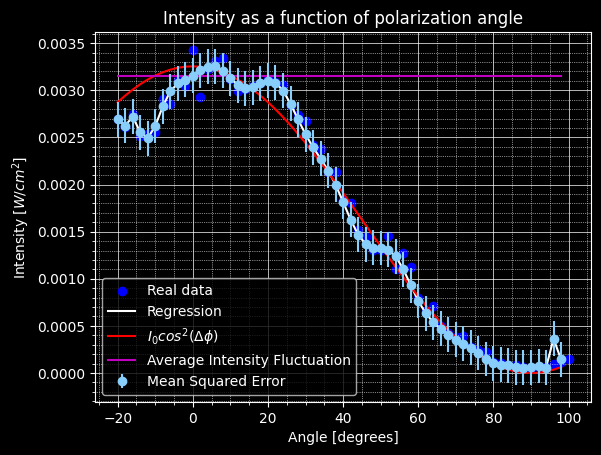

The mean squared error between the regression curve and the cos^2 function was  3.408113178046448e-08 [W/cm^2]
The intitial average fluctuations intersect with -10 degrees and 10 degrees


In [110]:
'''
Lastly, we are able to fit our 'best fit' regression curve to the data with error bars based on the mean squared error.
'''

with plt.style.context('dark_background'):
    plt.scatter(angle,final_avrg,color = 'blue',label = 'Real data')
    plt.plot(angle_pop,final_model,color='white',label = 'Regression')
    plt.plot(angle_pop,final_values,color = 'r',label = '$I_{0}cos^{2}(\Delta \phi)$')
    plt.plot(angle_pop,final_flucs,color = 'm',label='Average Intensity Fluctuation')
    plt.title('Intensity as a function of polarization angle')
    plt.xlabel('Angle [degrees]')
    plt.ylabel('Intensity [$W/cm^{2}]$')
    plt.minorticks_on()
    plt.grid(which='major', linestyle='-', linewidth='0.5')
    plt.grid(which='minor', linestyle=':', linewidth='0.5')
    plt.errorbar(angle_pop,final_model,np.sqrt(mse),color='lightskyblue',label='Mean Squared Error',fmt='o')
    plt.legend()
    plt.rcParams['axes.facecolor'] = 'dimgrey'
    plt.rcParams.update({'text.color': "grey",
                         'axes.labelcolor': "black"})
    plt.show()
    print('The mean squared error between the regression curve and the cos^2 function was ',mse, '[W/cm^2]')
    print('The intitial average fluctuations intersect with -10 degrees and 10 degrees')

___
### Conclusions

We found very good agreement between our data and the expected result for Malus' Law.  The mean squared error between the regression curve and the $cos^{2}(\Delta \phi)$ was $3.41\times 10^{-8}[W/cm^{2}],$ where $\Delta \phi = \alpha-\theta.$  As can be seen in the final graph, we were very accurate at angles close to 90 degrees.  We included our original long term exposure measurements of the power fluctuations as given in magenta in the graph.  Since we did not record the angle nor attempt to maximize the power detected, we wanted to see how this value would measure up against the maximum of our data.  If done properly, the magenta line would intersect with the highest intensity of light taken.  The intersection occured at -10 degrees and 10 degrees.  We conclude the polarization angle used during the long exposure fluctuation measurement was 64 degrees.  The fluctuations measured were fortunately close the the maximum intensity of light.  However, at the high angles closer to 0 degrees, we obtained more error.  The reason for this was likely dominated by the high fluctuations we had measured earlier.  In order to reduce this error, we may have taken more data points over a longer period of time for each data file.  We ended up taking two data points over 10 seconds and averaging them together for our power values.  If we had instead taken 10 data points over 10 seconds, this may have reduced our error.  However, the high variability of fluctuations still would have had some effect.  Taking random angles probably helped diminsh the error statistically.  In future iterations of this lab, Malus' Law might be further verified by going a full two periods in angle measurements instead of the 120 degrees of data we took.$\newline$
___